In [1]:
import os
import cv2
import random
import numpy as np
from collections import Counter
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt

In [17]:
# DTL T2
dtl_t2_accuracy = 0.6451612903225806
dtl_t2_sensitivity = 0.5
dtl_t2_specificity = 0.5454545454545454
dtl_t2_auc_score = 0.47979797979797983
dtl_t2_fpr = [0.0,0.022727272727272728,0.045454545454545456,0.045454545454545456,0.13636363636363635,0.13636363636363635,0.18181818181818182,0.18181818181818182,0.20454545454545456,0.20454545454545456,0.2727272727272727,0.2727272727272727,0.29545454545454547,0.29545454545454547,0.36363636363636365,0.36363636363636365,0.45454545454545453,0.45454545454545453,0.5454545454545454,0.5454545454545454,0.6363636363636364,0.6363636363636364,0.6818181818181818,0.6818181818181818,0.7045454545454546,0.7045454545454546,0.9545454545454546,0.9545454545454546,0.9772727272727273,0.9772727272727273,1.0,1.0]
dtl_t2_tpr = [0.0,0.0,0.0,0.05555555555555555,0.05555555555555555,0.1111111111111111,0.1111111111111111,0.16666666666666666,0.16666666666666666,0.2222222222222222,0.2222222222222222,0.3333333333333333,0.3333333333333333,0.3888888888888889,0.3888888888888889,0.4444444444444444,0.4444444444444444,0.5,0.5,0.5555555555555556,0.5555555555555556,0.6666666666666666,0.6666666666666666,0.7222222222222222,0.7222222222222222,0.7777777777777778,0.7777777777777778,0.8333333333333334,0.8333333333333334,0.8888888888888888,0.8888888888888888,1.0]
dtl_t2_precision = [0.2903225806451613,0.2786885245901639,0.2833333333333333,0.288135593220339,0.27586206896551724,0.2807017543859649,0.2857142857142857,0.2727272727272727,0.25925925925925924,0.2641509433962264,0.2692307692307692,0.27450980392156865,0.28,0.2857142857142857,0.2708333333333333,0.2765957446808511,0.2826086956521739,0.28888888888888886,0.29545454545454547,0.3023255813953488,0.30952380952380953,0.2926829268292683,0.3,0.3076923076923077,0.3157894736842105,0.2972972972972973,0.3055555555555556,0.3142857142857143,0.3235294117647059,0.30303030303030304,0.3125,0.3225806451612903,0.3333333333333333,0.3448275862068966,0.32142857142857145,0.3333333333333333,0.34615384615384615,0.32,0.3333333333333333,0.34782608695652173,0.3181818181818182,0.3333333333333333,0.35,0.3684210526315789,0.3888888888888889,0.4117647058823529,0.375,0.4,0.35714285714285715,0.3076923076923077,0.25,0.2727272727272727,0.3,0.3333333333333333,0.375,0.42857142857142855,0.3333333333333333,0.4,0.5,0.6666666666666666,1.0,1.0,1.0]
dtl_t2_recall = [1.0,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.8888888888888888,0.8888888888888888,0.8888888888888888,0.8333333333333334,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7777777777777778,0.7222222222222222,0.7222222222222222,0.7222222222222222,0.7222222222222222,0.7222222222222222,0.7222222222222222,0.7222222222222222,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.6111111111111112,0.6111111111111112,0.6111111111111112,0.6111111111111112,0.5555555555555556,0.5555555555555556,0.5555555555555556,0.5555555555555556,0.5555555555555556,0.5,0.5,0.5,0.4444444444444444,0.4444444444444444,0.4444444444444444,0.3888888888888889,0.3888888888888889,0.3888888888888889,0.3888888888888889,0.3888888888888889,0.3888888888888889,0.3333333333333333,0.3333333333333333,0.2777777777777778,0.2222222222222222,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.1111111111111111,0.1111111111111111,0.1111111111111111,0.1111111111111111,0.1111111111111111,0.05555555555555555,0.0]

# DTL ADC
dtl_adc_accuracy = 0.6774193548387096
dtl_adc_sensitivity = 0.6
dtl_adc_specificity = 0.5106382978723405
dtl_adc_auc_score = 0.5418439716312057
dtl_adc_fpr = [0.0,0.02127659574468085,0.02127659574468085,0.0425531914893617,0.0425531914893617,0.06382978723404255,0.06382978723404255,0.3191489361702128,0.3191489361702128,0.46808510638297873,0.46808510638297873,0.48936170212765956,0.48936170212765956,0.6595744680851063,0.6595744680851063,0.7446808510638298,0.7446808510638298,0.8085106382978723,0.8085106382978723,0.8297872340425532,0.8297872340425532,0.9148936170212766,0.9148936170212766,1.0]
dtl_adc_tpr = [0.0,0.0,0.06666666666666667,0.06666666666666667,0.13333333333333333,0.13333333333333333,0.26666666666666666,0.26666666666666666,0.4666666666666667,0.4666666666666667,0.5333333333333333,0.5333333333333333,0.6,0.6,0.6666666666666666,0.6666666666666666,0.7333333333333333,0.7333333333333333,0.8666666666666667,0.8666666666666667,0.9333333333333333,0.9333333333333333,1.0,1.0]
dtl_adc_precision = [0.25862068965517243,0.24561403508771928,0.25,0.2545454545454545,0.25925925925925924,0.2641509433962264,0.25,0.2549019607843137,0.24,0.22448979591836735,0.22916666666666666,0.23404255319148937,0.2391304347826087,0.2222222222222222,0.22727272727272727,0.23255813953488372,0.23809523809523808,0.24390243902439024,0.225,0.23076923076923078,0.23684210526315788,0.24324324324324326,0.25,0.2571428571428571,0.2647058823529412,0.2727272727272727,0.28125,0.25806451612903225,0.26666666666666666,0.2413793103448276,0.25,0.25925925925925924,0.2692307692307692,0.28,0.2916666666666667,0.30434782608695654,0.3181818181818182,0.2857142857142857,0.25,0.21052631578947367,0.2222222222222222,0.23529411764705882,0.25,0.26666666666666666,0.2857142857142857,0.3076923076923077,0.3333333333333333,0.36363636363636365,0.4,0.4444444444444444,0.5,0.5714285714285714,0.5,0.4,0.5,0.3333333333333333,0.5,0.0,1.0]
dtl_adc_recall = [1.0,0.9333333333333333,0.9333333333333333,0.9333333333333333,0.9333333333333333,0.9333333333333333,0.8666666666666667,0.8666666666666667,0.8,0.7333333333333333,0.7333333333333333,0.7333333333333333,0.7333333333333333,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.5333333333333333,0.5333333333333333,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4666666666666667,0.4,0.3333333333333333,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.26666666666666666,0.2,0.13333333333333333,0.13333333333333333,0.06666666666666667,0.06666666666666667,0.0,0.0]


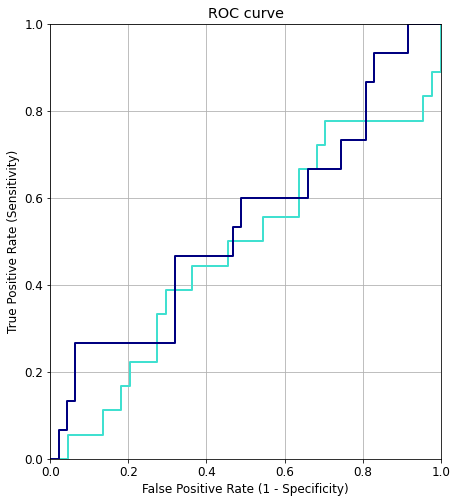

In [18]:
plt.figure(figsize=(7, 8))
plt.plot(dtl_t2_fpr, dtl_t2_tpr, color='turquoise', lw=2, label='DTL-T2')
plt.plot(dtl_adc_fpr, dtl_adc_tpr, color='navy', lw=2, label='DTL-ADC')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

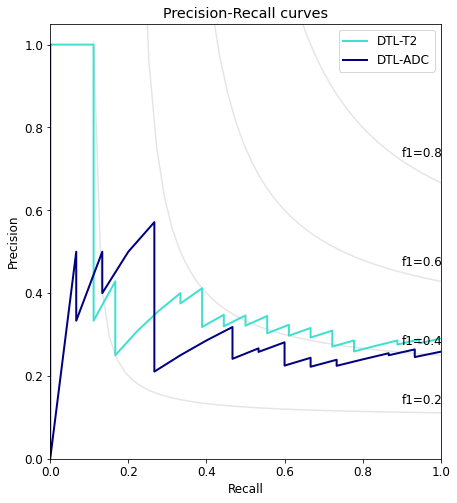

In [20]:
# colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

plt.plot(dtl_t2_recall, dtl_t2_precision, color='turquoise', lw=2, label='DTL-T2')
plt.plot(dtl_adc_recall, dtl_adc_precision, color='navy', lw=2, label='DTL-ADC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend()

plt.show()